<a class="anchor" id="toc"></a>
# Documentation
* Dcel
    * [`__init__()`](#dcel_init)
* uCosmos
    * [TNT (Tools 'n' Types)](#cosmos_tnt)
    
other:
* [Playground](#playground)

## Setup

In [8]:
from IPython.display import display, HTML

In [7]:
import logging
import graphviz
logging.basicConfig(format='[%(levelname)s@%(name)s] %(message)s', level=logging.DEBUG)
graphviz.__version__, graphviz.version()

[DEBUG@graphviz.backend.execute] run [PosixPath('dot'), '-V']


('0.20.1', (2, 43, 0))

In [47]:
import plantuml
plant = plantuml.PlantUML(url='http://www.plantuml.com/plantuml/img/')

In [1]:
from rr_diagrams import display_rr

<a href='#toc'>toc</a>
## Dcel::`__init__()` <a class="anchor" id="dcel_init"></a>

[DEBUG@graphviz.backend.execute] run [PosixPath('dot'), '-Kdot', '-Tsvg']


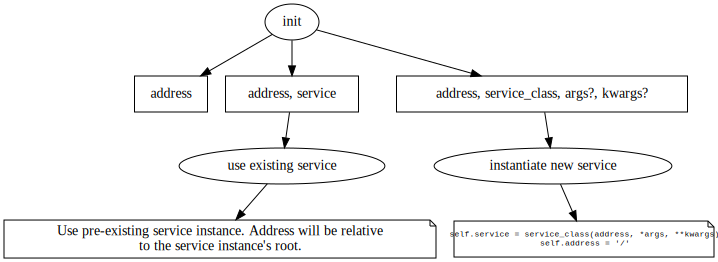

In [10]:
# Graph Source
dini = graphviz.Source('''
digraph "Dcel init flow"
{
    rankdir=TB;
    node [shape=box];

    init [label="init", shape=oval]
    address [label="address"]
    service [label="address, service"]
    service_class [label="address, service_class, args?, kwargs?"]
    
    init -> address, service, service_class
    
    service_class -> new_service -> new_service_proc
    service -> use_service -> use_service_proc
    
    use_service [label="use existing service", shape=oval]
    use_service_proc [
    label="Use pre-existing service instance. Address will be relative
    to the service instance's root."
    shape=note
    ]
    
    new_service [label="instantiate new service",shape=oval]
    new_service_proc [
    label="self.service = service_class(address, *args, **kwargs)
    self.address = \'/\'",
    shape=note,
    fontname="Courier",
    fontsize="8pt"]
    
}
''')
dini

## WIP: Instantiating a type which requires user input, and web-access to initialize

### via Fudge

1. Requested Resource: A method is called with a path.
2. 

Example psuedo-code request which creates this situation:

    new rclone/dropbox ~/.config/rclone/rclone.conf/mydropbox
    
The inputs that are needed can be satisfied by running:

    rclone 


In [50]:
img = plant.processes("""
@startuml
participant User
participant FileSystem
participant mknod

User -> FileSystem: touch(filepath)
activate FileSystem
FileSystem -> mknod: mknod(filepath)
activate mknod
mknod --> FileSystem: Resource created / Error occurred
deactivate mknod
FileSystem --> User: Result
deactivate FileSystem
@enduml
""")

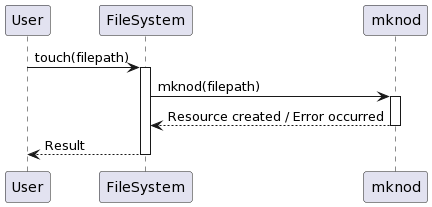

In [51]:
display.Image(img)

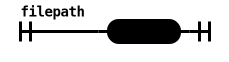

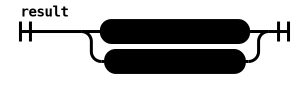

In [4]:
bnf_string = """
filepath ::= string
result ::= proper_resource | error_document
"""
display_rr(bnf_string)

<a href='#toc'>toc</a>
## uCosmos: TNT (Tools 'n' Types) <a class="anchor" id="cosmos_tnt"></a>

- Inside a snail folder `@/`:
    - __Tools__ defines tools which work on any generic directory entry. A tool might create a stateful interface which edits nodes within the filesystem context.
    - __Types__ define object types, which can be instantiated as files or directory structures within the filesystem context of the @/ directory. The type structure follows OOP form. 
    

General layout:

    @/
        Tools/
            some_tool
        Types/
            some_type
            


### Tools


### Types

The type directory for an object type includes

- parser
- generator and templates
- sub-cosmos type system


        


[DEBUG@graphviz.backend.execute] run [PosixPath('dot'), '-Kdot', '-Tsvg']


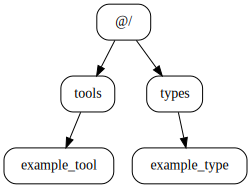

In [25]:
# Graph Source
snail_tnt_gv = graphviz.Source("""
digraph {
    node [shape=box, style=rounded]
    "@/" -> {tools types}
    tools -> example_tool
    types -> example_type
}
""")
snail_tnt_gv

<a href="#toc">toc</a>
## Playground <a class="anchor" id="playground"></a>

In [2]:
# Playground: IPython html
from IPython.display import display, HTML
display(HTML("<h1>hello</h1"))